# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [222]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = r"C:\Users\Sezy\OneDrive\Data_Vis_Challenege\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\Sezy\OneDrive\Data_Vis_Challenege\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [223]:
# Merge
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID" )
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [224]:
#Number of mice
num_of_mice = combined_data["Mouse ID"].nunique()
num_of_mice

249

In [225]:
# Keep is = to False so all duplicates are true. Thus displaying duplicated data. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# .unique so it only displays g989 one time. 
dup_ids =duplicate_mice['Mouse ID'].unique()
dup_ids

array(['g989'], dtype=object)

#Optional

In [226]:
# Data for all 989 
duplicate_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [227]:
clean_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [228]:
#Clean Data to use now, removing mouse 989
clean_data["Mouse ID"].nunique()

248

In [229]:
# I love this Agg command. Found it online and love it. 
# I did the Agg command because it is amazing. 
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [230]:
# Starting Pandas
count = clean_data['Drug Regimen'].value_counts()
count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

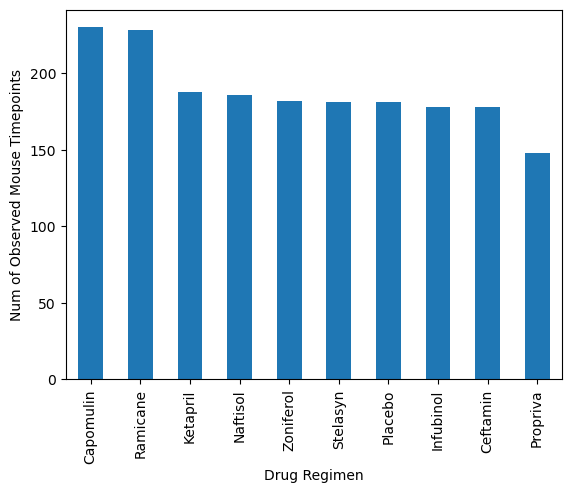

In [231]:
#Pandas 
ax = count.plot(kind="bar",)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Num of Observed Mouse Timepoints")
plt.show()

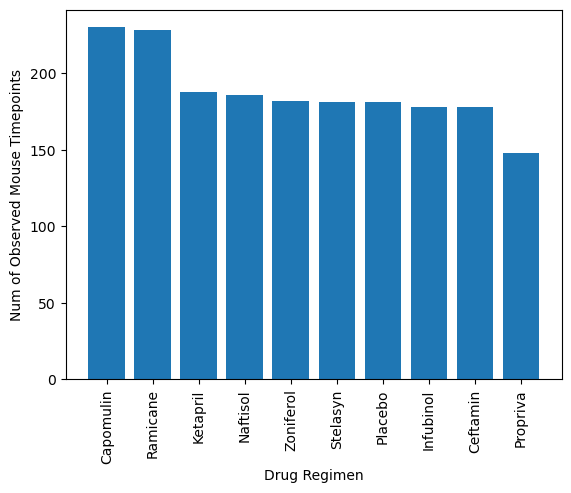

In [232]:
#PyPlot
x_labels = count.index
y_values = count.values
plt.bar(x_labels, y_values)

# Set the axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

#Pandas Pie

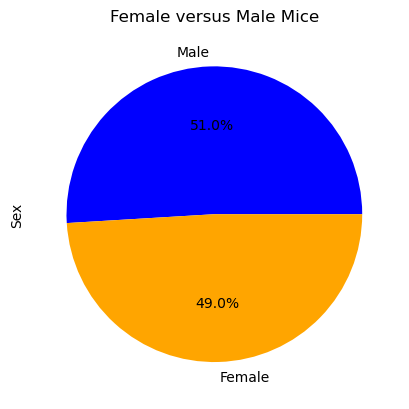

In [233]:
Sex = clean_data['Sex'].value_counts()

ax = Sex.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])

ax.set_title('Female versus Male Mice')
ax.set_ylabel("Sex")

plt.show()

#PyPlot Pie

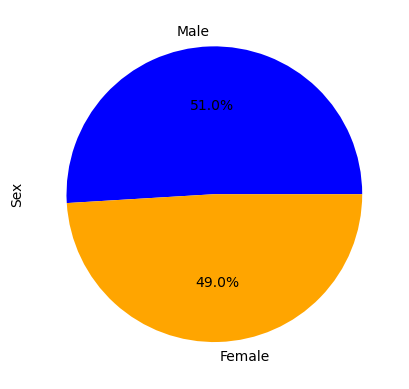

In [234]:
labels = Sex.index
Size = Sex.values
# generate colors
colors = ["Blue", "Orange"]
plt.pie(Size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [235]:
# Had to use a reset index to create a dataframe
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

In [236]:
# Merge into new dataframe
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [237]:
# Treatment list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [238]:
# Empty List
tumor_volume_data = []
# Loop
for treatment in treatments:
    # Locate treatment in treatments
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append 
    tumor_volume_data.append(treatment_data)
    # Quartiles
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} Potential outliers for : {outliers}")

Capomulin Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential outliers for : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)


Boxplot for Outliers


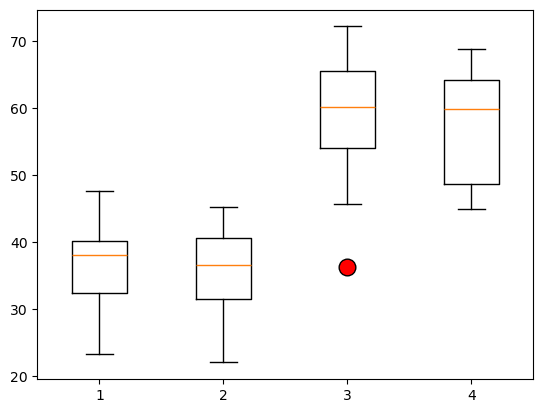

In [239]:
# Found filler props on Stack Overflow
plt.boxplot(tumor_volume_data,flierprops=dict(markerfacecolor='red',markersize = 12))
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

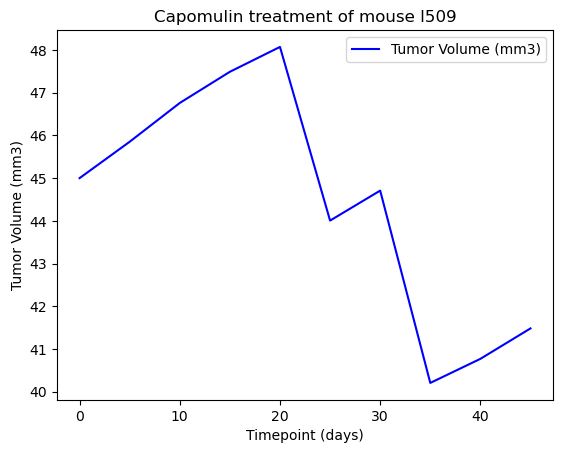

In [240]:
# mouse l509
# not sure how to get riud of the legend i have
mouse_data = clean_data[(clean_data['Mouse ID'] == 'l509') & (clean_data['Drug Regimen'] == 'Capomulin')]
mouse_data
ax1 = mouse_data.plot(kind="line", x="Timepoint", y='Tumor Volume (mm3)', color = "blue")
ax1.set_title("Capomulin treatment of mouse l509")
ax1.set_xlabel("Timepoint (days)")
ax1.set_ylabel("Tumor Volume (mm3)")

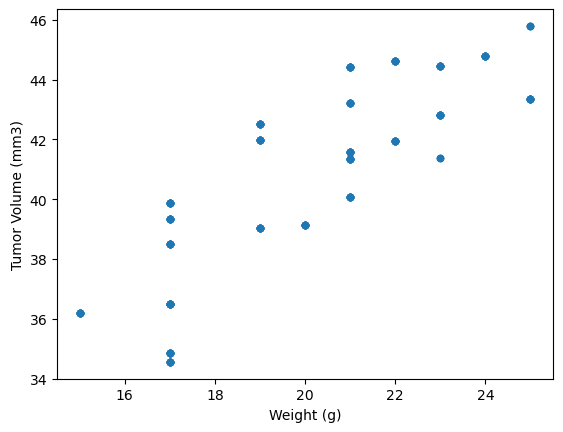

In [241]:
Capomulin_data = clean_data[(clean_data['Drug Regimen'] == "Capomulin")]
tumor_volume_data = Capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
Capomulin_data = pd.merge(tumor_volume_data, Capomulin_data[["Mouse ID", "Weight (g)"]], on="Mouse ID")
ax2 = Capomulin_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")


[]

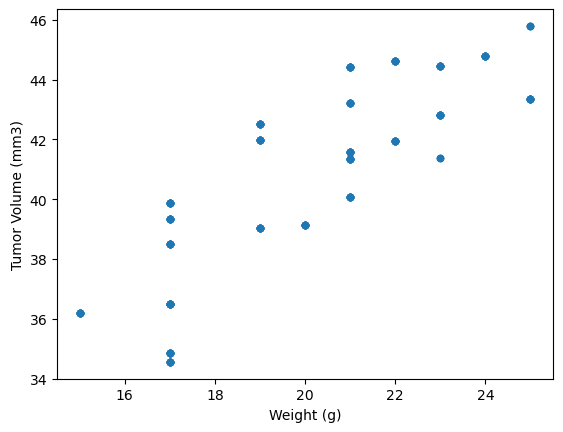

In [242]:
ax2 = Capomulin_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.plot()

The correlation between mouse weight and the average tumor volume is 0.83


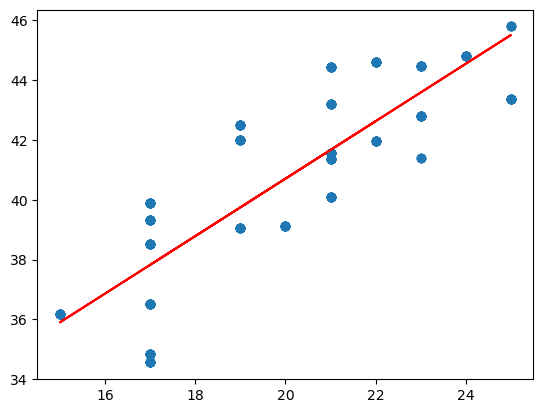

In [255]:
correlation_coefficient = Capomulin_data['Weight (g)'].corr(Capomulin_data['Tumor Volume (mm3)'])
correlation_coefficient = round(correlation_coefficient,2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
# regression
x_values = Capomulin_data["Weight (g)"]
y_values = Capomulin_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()